# EDA for Amazon Reviews for Sentiment Analysis

Berikut Exploratory Data Analysis (EDA) pada the Amazon Reviews dataset yang di download dari Kaggle.



In [1]:
# Install required packages
!pip install pandas numpy matplotlib seaborn wordcloud nltk kaggle

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import os
from sklearn.model_selection import train_test_split
import nltk
from google.colab import files
import zipfile
import glob
import bz2

# Download NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')  # Added to fix LookupError
nltk.download('stopwords')

# Ensure matplotlib inline for Colab
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Check if processed dataset exists
processed_file = 'amazon_reviews_processed.csv'
if os.path.exists(processed_file):
    print(f"Loading existing processed dataset from {processed_file}...")
    df = pd.read_csv(processed_file)
else:
    # Upload Kaggle API token
    def setup_kaggle_api():
        print("Please upload your kaggle.json file:")
        uploaded = files.upload()
        if 'kaggle.json' not in uploaded:
            raise FileNotFoundError("Please upload kaggle.json file.")
        os.makedirs('/root/.kaggle', exist_ok=True)
        with open('/root/.kaggle/kaggle.json', 'wb') as f:
            f.write(uploaded['kaggle.json'])
        os.chmod('/root/.kaggle/kaggle.json', 600)
        print("Kaggle API token set up successfully.")

    # Download dataset from Kaggle
    def download_kaggle_dataset():
        dataset = "bittlingmayer/amazonreviews"
        os.makedirs('./dataset', exist_ok=True)
        try:
            os.system(f"kaggle datasets download -d {dataset} -p ./dataset")
            zip_file = glob.glob('./dataset/amazonreviews.zip')
            if not zip_file:
                raise FileNotFoundError("Failed to download amazonreviews.zip.")
            with zipfile.ZipFile(zip_file[0], 'r') as zip_ref:
                zip_ref.extractall('./dataset')
            print("Dataset zip extracted successfully.")

            train_txt = './dataset/train.ft.txt'
            train_bz2 = './dataset/train.ft.txt.bz2'
            if os.path.exists(train_bz2):
                print("Found train.ft.txt.bz2, decompressing...")
                with bz2.BZ2File(train_bz2, 'rb') as source, open(train_txt, 'wb') as dest:
                    dest.write(source.read())
                print("Decompressed train.ft.txt successfully.")
            elif not os.path.exists(train_txt):
                raise FileNotFoundError("train.ft.txt not found after extraction.")
            else:
                print("Found train.ft.txt, proceeding.")
        except Exception as e:
            print(f"Error downloading dataset: {e}")
            print("Please manually upload train.ft.txt to Colab.")
            uploaded = files.upload()
            for fn in uploaded.keys():
                os.makedirs('./dataset', exist_ok=True)
                with open('./dataset/train.ft.txt', 'wb') as f:
                    f.write(uploaded[fn])
            print("Manual upload completed.")

    # Load and preprocess dataset
    def load_and_preprocess_data():
        file_path = './dataset/train.ft.txt'
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"File {file_path} not found.")

        reviews = []
        labels = []
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                try:
                    label, text = line.split(' ', 1)
                    label = 0 if label == '__label__1' else 1  # 0: Negatif, 1: Positif
                    reviews.append(text.strip())
                    labels.append(label)
                except ValueError:
                    continue

        df = pd.DataFrame({'text': reviews, 'label': labels})
        df['score'] = df['label'].apply(lambda x: np.random.choice([1, 2, 3, 4, 5], p=[0.3, 0.2, 0.1, 0.2, 0.2]))
        df['sentiment'] = df['score'].map({1: 'Negatif', 2: 'Negatif', 3: 'Netral', 4: 'Positif', 5: 'Positif'})

        negatif = df[df['sentiment'] == 'Negatif'].sample(450, random_state=42)
        netral = df[df['sentiment'] == 'Netral'].sample(300, random_state=42)
        positif = df[df['sentiment'] == 'Positif'].sample(750, random_state=42)

        df_sampled = pd.concat([negatif, netral, positif]).reset_index(drop=True)
        return df_sampled

    # Run setup and download
    setup_kaggle_api()
    download_kaggle_dataset()
    df = load_and_preprocess_data()
    df.to_csv('amazon_reviews_processed.csv', index=False)
    print("Processed dataset saved as 'amazon_reviews_processed.csv'.")

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
Kaggle API token set up successfully.
Dataset zip extracted successfully.
Found train.ft.txt.bz2, decompressing...
Decompressed train.ft.txt successfully.
Processed dataset saved as 'amazon_reviews_processed.csv'.


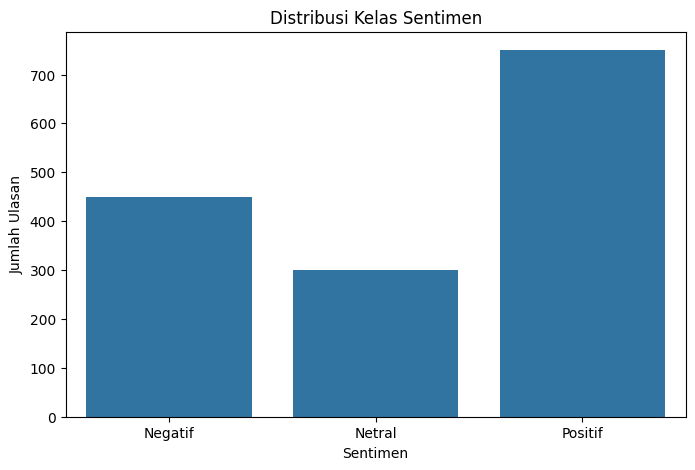

Jumlah data per kelas:
sentiment
Positif    750
Negatif    450
Netral     300
Name: count, dtype: int64


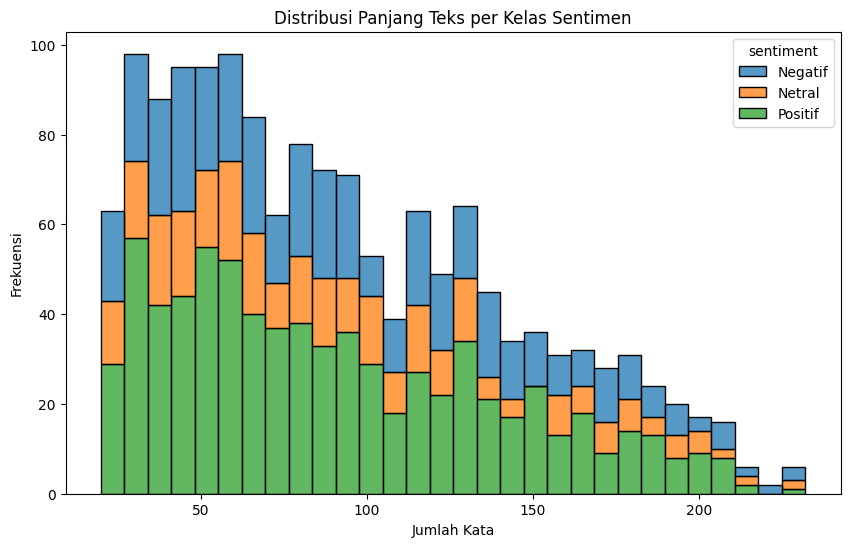

Statistik panjang teks:
           count       mean        std   min    25%   50%     75%    max
sentiment                                                               
Negatif    450.0  95.637778  50.939633  22.0  52.25  86.5  133.75  232.0
Netral     300.0  91.863333  50.790849  20.0  52.00  83.0  122.25  231.0
Positif    750.0  90.210667  48.747582  20.0  50.00  79.5  126.00  227.0


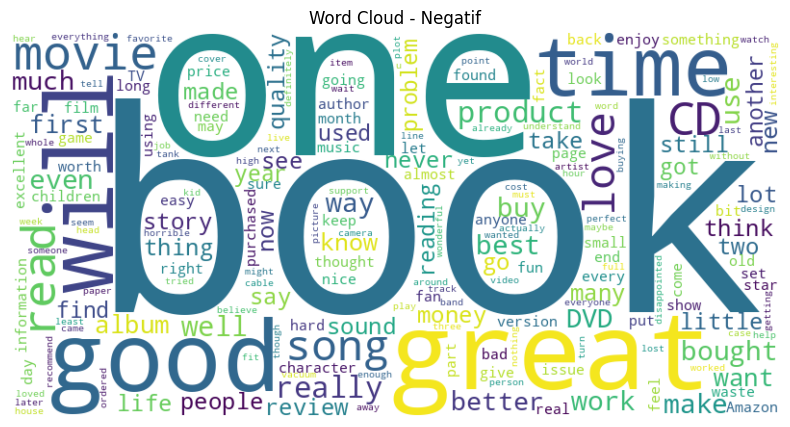

Kata teratas untuk Negatif:
[('book', 281), ('one', 169), ('great', 152), ('good', 132), ('like', 121), ('would', 119), ('get', 115), ('read', 85), ('time', 81), ('movie', 80)]


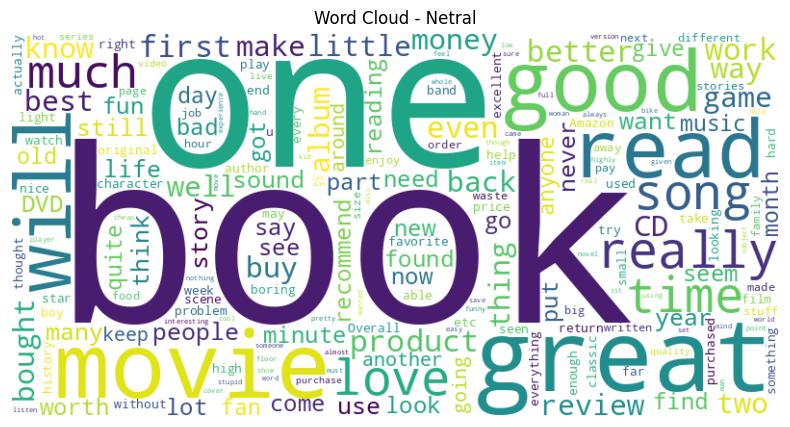

Kata teratas untuk Netral:
[('book', 150), ('one', 100), ('great', 99), ('like', 93), ('movie', 74), ('would', 68), ('good', 68), ('could', 62), ('read', 62), ('get', 58)]


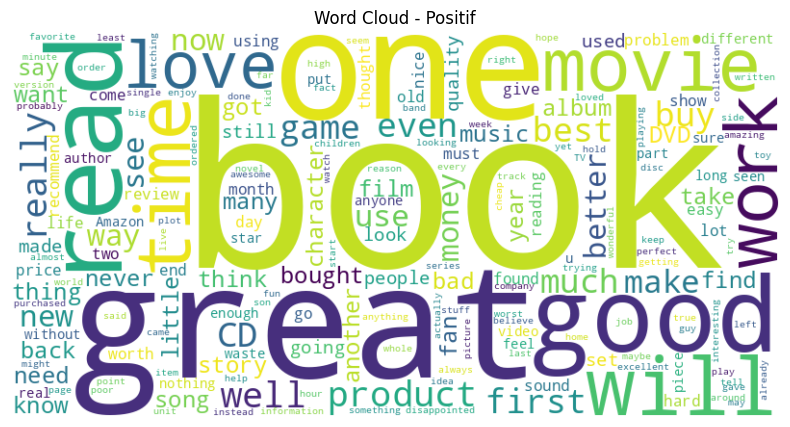

Kata teratas untuk Positif:
[('book', 420), ('great', 262), ('like', 240), ('one', 233), ('would', 183), ('good', 165), ('read', 155), ('get', 141), ('time', 124), ('well', 118)]


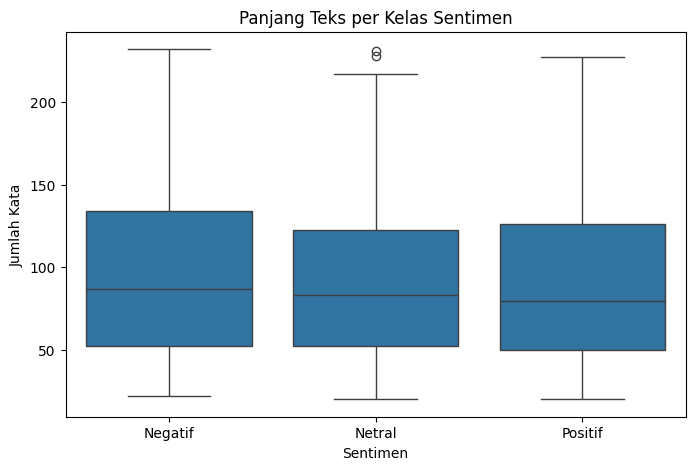

In [3]:
# Perform EDA
def perform_eda(df):
    # 4.1 Distribusi Kelas
    plt.figure(figsize=(8, 5))
    sns.countplot(x='sentiment', data=df, order=['Negatif', 'Netral', 'Positif'])
    plt.title('Distribusi Kelas Sentimen')
    plt.xlabel('Sentimen')
    plt.ylabel('Jumlah Ulasan')
    plt.show()

    print("Jumlah data per kelas:")
    print(df['sentiment'].value_counts())

    # 4.2 Panjang Teks
    df['text_length'] = df['text'].apply(lambda x: len(word_tokenize(x)))
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='text_length', hue='sentiment', multiple='stack', bins=30)
    plt.title('Distribusi Panjang Teks per Kelas Sentimen')
    plt.xlabel('Jumlah Kata')
    plt.ylabel('Frekuensi')
    plt.show()

    print("Statistik panjang teks:")
    print(df.groupby('sentiment')['text_length'].describe())

    # 4.3 Frekuensi Kata
    def get_top_words(texts, n=10):
        stop_words = set(stopwords.words('english'))
        all_words = []
        for text in texts:
            words = word_tokenize(text.lower())
            words = [word for word in words if word.isalpha() and word not in stop_words]
            all_words.extend(words)
        return Counter(all_words).most_common(n)

    # Word Cloud dan Frekuensi Kata per Kelas
    for sentiment in ['Negatif', 'Netral', 'Positif']:
        texts = df[df['sentiment'] == sentiment]['text']
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(texts))

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud - {sentiment}')
        plt.axis('off')
        plt.show()

        print(f"Kata teratas untuk {sentiment}:")
        print(get_top_words(texts, 10))

    # 4.4 Korelasi Panjang Teks dan Sentimen
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='sentiment', y='text_length', data=df)
    plt.title('Panjang Teks per Kelas Sentimen')
    plt.xlabel('Sentimen')
    plt.ylabel('Jumlah Kata')
    plt.show()

# Run EDA
perform_eda(df)

In [4]:
# Cell untuk menyimpan dan memverifikasi hasil data CSV
from google.colab import drive
from google.colab import files
import os

def save_processed_data(df, local_path='amazon_reviews_processed.csv', drive_path='/content/drive/MyDrive/amazon_reviews_processed.csv'):
    # Simpan ke direktori lokal Colab
    try:
        df.to_csv(local_path, index=False)
        print(f"Dataset berhasil disimpan ke {local_path}")

        # Verifikasi file lokal
        if os.path.exists(local_path):
            print(f"File {local_path} terdeteksi, ukuran: {os.path.getsize(local_path)} bytes")
        else:
            print(f"Error: File {local_path} tidak ditemukan setelah penyimpanan.")
    except Exception as e:
        print(f"Error saat menyimpan ke lokal: {e}")

    # Simpan ke Google Drive
    try:
        drive.mount('/content/drive', force_remount=True)
        df.to_csv(drive_path, index=False)
        print(f"Dataset berhasil disimpan ke Google Drive: {drive_path}")

        # Verifikasi file di Google Drive
        if os.path.exists(drive_path):
            print(f"File {drive_path} terdeteksi di Google Drive, ukuran: {os.path.getsize(drive_path)} bytes")
        else:
            print(f"Error: File {drive_path} tidak ditemukan di Google Drive.")
    except Exception as e:
        print(f"Error saat menyimpan ke Google Drive: {e}")

    # Opsi untuk mengunduh file secara langsung
    download_option = input("Apakah Anda ingin mengunduh file CSV secara langsung? (y/n): ")
    if download_option.lower() == 'y':
        files.download(local_path)
        print(f"File {local_path} diunduh.")

# Jalankan penyimpanan
save_processed_data(df)

Dataset berhasil disimpan ke amazon_reviews_processed.csv
File amazon_reviews_processed.csv terdeteksi, ukuran: 680990 bytes
Mounted at /content/drive
Dataset berhasil disimpan ke Google Drive: /content/drive/MyDrive/amazon_reviews_processed.csv
File /content/drive/MyDrive/amazon_reviews_processed.csv terdeteksi di Google Drive, ukuran: 680990 bytes
Apakah Anda ingin mengunduh file CSV secara langsung? (y/n): y


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File amazon_reviews_processed.csv diunduh.
